In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
crime_df = pd.read_csv("Crimes_-_2010_to_2023.csv")
crime_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Logitude,Location
0,7823660,HS634379,11/19/10 9:00,076XX S ABERDEEN ST,320,ROBBERY,STRONG ARM - NO WEAPON,RESIDENCE,True,False,...,17.0,71,3,1170306.0,1854179.0,2010,9/14/23 15:41,41.755353,-87.651440,"(41.755353249, -87.651440192)"
1,12850000,JF423109,11/24/10 0:00,046XX S SPAULDING AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,12.0,58,17,1155157.0,1873719.0,2010,9/19/23 15:41,41.809290,-87.706436,"(41.809289985, -87.706435685)"
2,12422166,JE300051,6/1/10 0:00,063XX S CALIFORNIA AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,True,False,...,16.0,66,17,NaN,NaN,2010,9/20/23 15:41,NaN,NaN,NaN
3,7420190,HS221724,3/23/10 12:36,045XX S FORRESTVILLE AVE,261,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,...,3.0,38,2,1180700.0,1875059.0,2010,9/23/23 15:41,41.812418,-87.612708,"(41.812417562, -87.61270782)"
4,7686289,HS492280,8/31/10 17:00,027XX S INDIANA AVE,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,True,...,4.0,35,2,1178044.0,1886556.0,2010,9/29/23 15:41,41.844027,-87.622101,"(41.844026941, -87.622100808)"


In [18]:
print(crime_df.columns)


Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Logitude ',
       'Location'],
      dtype='object')


In [19]:
crime_df.drop(['Case Number', 'IUCR', 'Beat', 'District', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Location'], axis=1, inplace=True)
crime_df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Ward,Year,Updated On,Latitude,Logitude
0,7823660,11/19/10 9:00,076XX S ABERDEEN ST,ROBBERY,STRONG ARM - NO WEAPON,RESIDENCE,True,False,17.0,2010,9/14/23 15:41,41.755353,-87.651440
1,12850000,11/24/10 0:00,046XX S SPAULDING AVE,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,12.0,2010,9/19/23 15:41,41.809290,-87.706436
2,12422166,6/1/10 0:00,063XX S CALIFORNIA AVE,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,True,False,16.0,2010,9/20/23 15:41,NaN,NaN
3,7420190,3/23/10 12:36,045XX S FORRESTVILLE AVE,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,3.0,2010,9/23/23 15:41,41.812418,-87.612708
4,7686289,8/31/10 17:00,027XX S INDIANA AVE,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,True,4.0,2010,9/29/23 15:41,41.844027,-87.622101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
254343,13546357,7/29/24 14:50,079XX S CICERO AVE,THEFT,$500 AND UNDER,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,18.0,2024,8/6/24 15:40,41.748060,-87.741303
254344,13551304,7/29/24 12:00,017XX W COLUMBIA AVE,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,49.0,2024,8/6/24 15:40,42.004380,-87.674446
254345,13546005,7/29/24 1:00,051XX S INDIANA AVE,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,3.0,2024,8/6/24 15:40,41.801297,-87.621007
254346,13552326,7/24/24 16:00,087XX S BEVERLY AVE,THEFT,OVER $500,APARTMENT,False,False,19.0,2024,8/6/24 15:40,41.734732,-87.671948


In [20]:
top_6_primary_types = crime_df['Primary Type'].value_counts().head(6)
print(top_6_primary_types)

Primary Type
THEFT                  55862
BATTERY                42224
CRIMINAL DAMAGE        26437
MOTOR VEHICLE THEFT    22352
ASSAULT                21563
DECEPTIVE PRACTICE     17606
Name: count, dtype: int64


<Figure size 1400x800 with 0 Axes>

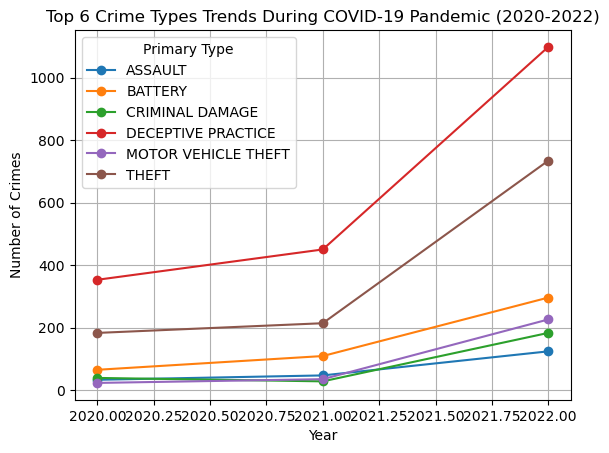

In [21]:
import matplotlib.pyplot as plt

# Assuming 'crime_df' is already preprocessed and contains the 'Year' and 'Primary Type' columns

# Identify the top 6 most common 'Primary Type' values
top_6_primary_types = crime_df['Primary Type'].value_counts().head(6).index

# Filter the data for the top 6 crime types and years 2020-2022
pandemic_crimes_df = crime_df[(crime_df['Primary Type'].isin(top_6_primary_types)) &
                              (crime_df['Year'].isin([2020, 2021, 2022]))]

# Group by 'Year' and 'Primary Type' and count the number of crimes
pandemic_crime_trend = pandemic_crimes_df.groupby(['Year', 'Primary Type']).size().unstack()

# Plot the trends over time for the top 6 crime types during the pandemic years
plt.figure(figsize=(14, 8))
pandemic_crime_trend.plot(kind='line', marker='o')

# Add title and labels
plt.title('Top 6 Crime Types Trends During COVID-19 Pandemic (2020-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(title='Primary Type')
plt.grid(True)

# Display the plot
plt.show()

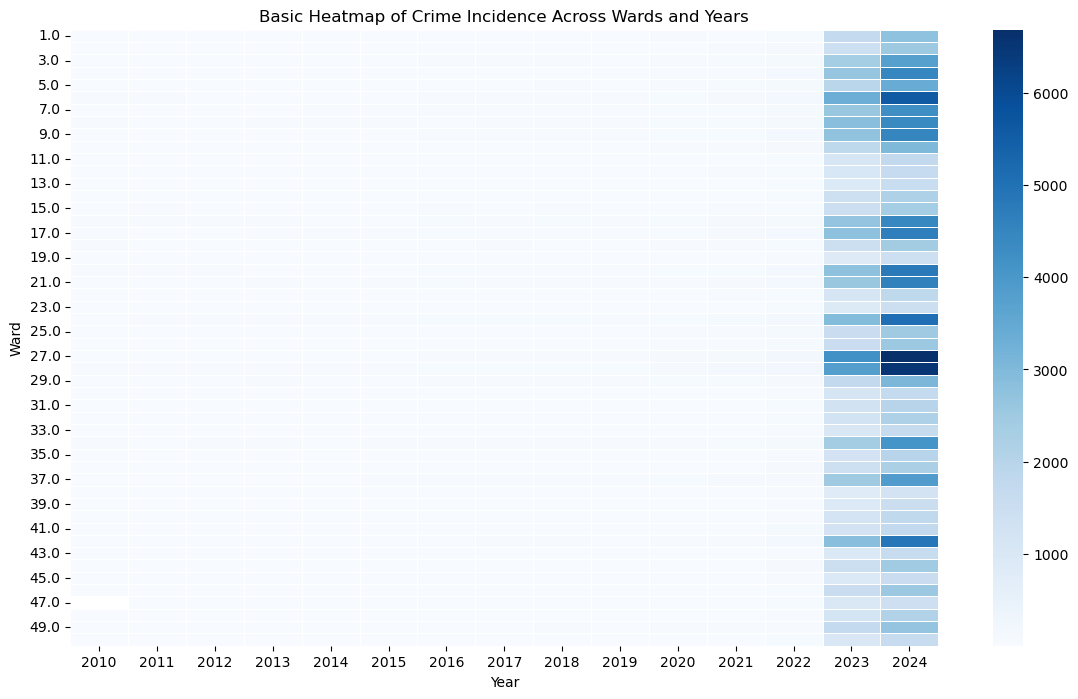

In [22]:
# Group by 'Ward' and 'Year' to count the number of crimes in each ward per year
ward_year_crime_counts = crime_df.groupby(['Ward', 'Year']).size().unstack()

# Create a basic heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(ward_year_crime_counts, cmap="Blues", linewidths=.5)

# Add title and labels
plt.title('Basic Heatmap of Crime Incidence Across Wards and Years')
plt.xlabel('Year')
plt.ylabel('Ward')

# Display the plot
plt.show()

In [23]:
ward_crime_counts = crime_df['Ward'].value_counts()
most_affected_wards = ward_crime_counts.head()
least_affected_wards = ward_crime_counts.tail()

print("Most Affected Wards:")
print(most_affected_wards)

print("\nLeast Affected Wards:")
print(least_affected_wards)

Most Affected Wards:
Ward
27.0    11585
28.0    11296
6.0      9569
24.0     8755
20.0     8206
Name: count, dtype: int64

Least Affected Wards:
Ward
39.0    2603
47.0    2565
23.0    2549
19.0    2465
38.0    2186
Name: count, dtype: int64


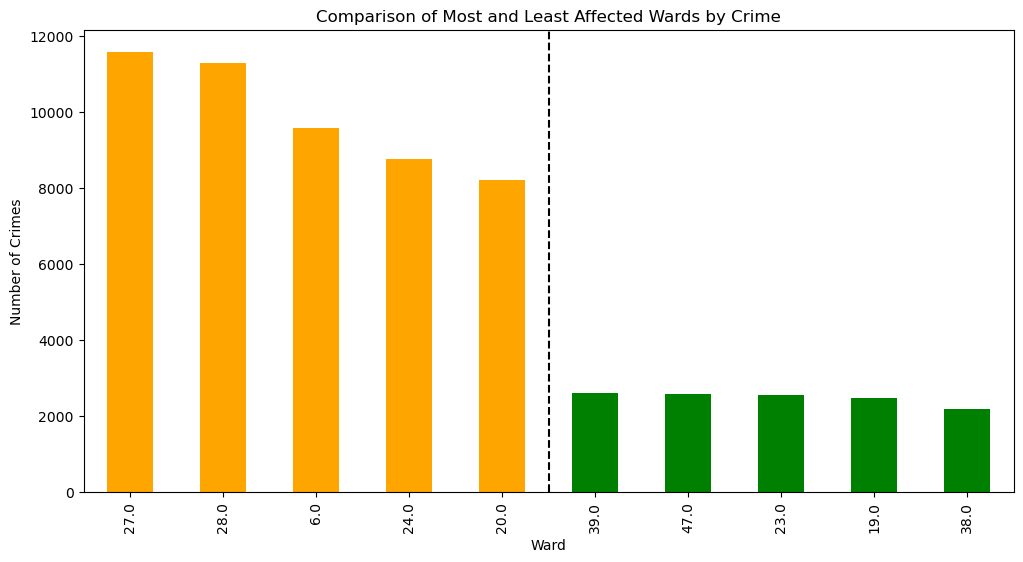

In [31]:
# Combine most affected and least affected wards into a single DataFrame
combined_wards = pd.concat([most_affected_wards, least_affected_wards])

# Create a bar chart
plt.figure(figsize=(12, 6))
combined_wards.plot(kind='bar', color=['orange'] * len(most_affected_wards) + ['green'] * len(least_affected_wards))

# Add title and labels
plt.title('Comparison of Most and Least Affected Wards by Crime')
plt.xlabel('Ward')
plt.ylabel('Number of Crimes')

# Highlight the different sections
plt.axvline(x=len(most_affected_wards) - 0.5, color='black', linestyle='--')

# Display the plot
plt.show()


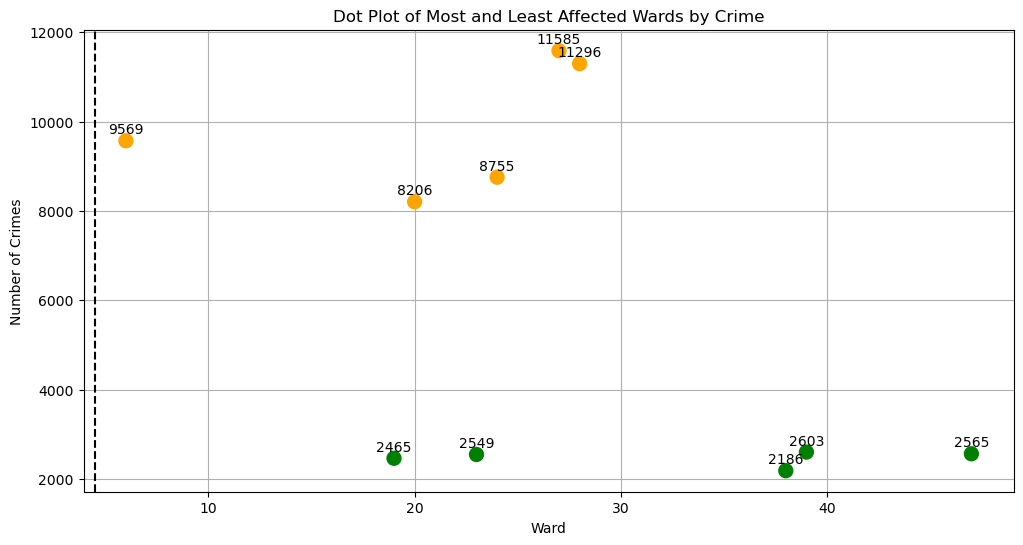

In [32]:
import matplotlib.pyplot as plt

# Prepare the data for dot plot
wards = combined_wards.index
crime_counts = combined_wards.values
colors = ['orange'] * len(most_affected_wards) + ['green'] * len(least_affected_wards)

# Create a dot plot
plt.figure(figsize=(12, 6))
plt.scatter(wards, crime_counts, color=colors, s=100)

# Add title and labels
plt.title('Dot Plot of Most and Least Affected Wards by Crime')
plt.xlabel('Ward')
plt.ylabel('Number of Crimes')

# Add a horizontal line to separate most and least affected wards
plt.axvline(x=len(most_affected_wards) - 0.5, color='black', linestyle='--')

# Highlight the data points with annotations
for i, txt in enumerate(crime_counts):
    plt.annotate(txt, (wards[i], crime_counts[i]), textcoords="offset points", xytext=(0,5), ha='center')

# Display the plot
plt.grid(True)
plt.show()

In [24]:
# Calculate the crime counts per ward
ward_crime_counts = crime_df.groupby('Ward').size()

# Convert the index to a Series so that it can be correlated
ward_numeric = pd.Series(ward_crime_counts.index.astype(float))

# Calculate the correlation between ward number and crime counts
correlation = ward_numeric.corr(ward_crime_counts)

print(f"Correlation between Ward and Crime Incidence: {correlation}")


Correlation between Ward and Crime Incidence: -0.3210497227960682


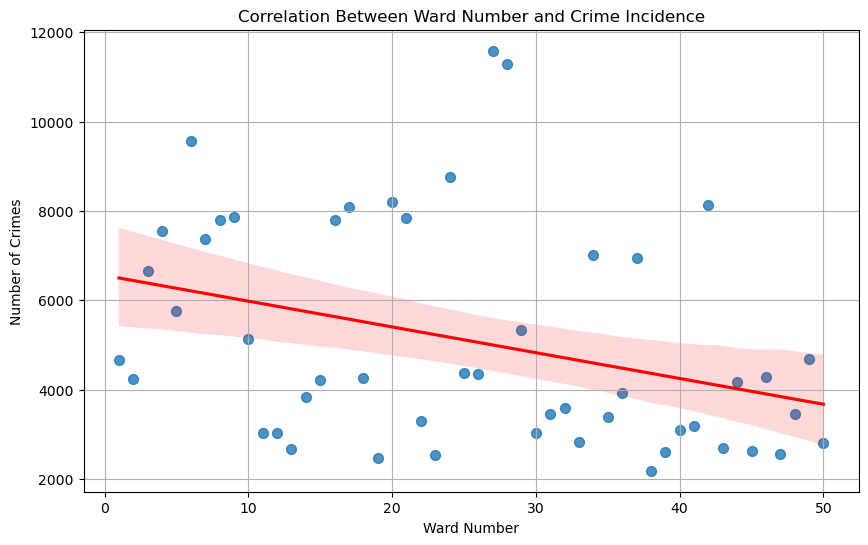

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=ward_numeric, y=ward_crime_counts, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Add title and labels
plt.title('Correlation Between Ward Number and Crime Incidence')
plt.xlabel('Ward Number')
plt.ylabel('Number of Crimes')

# Display the plot
plt.grid(True)
plt.show()

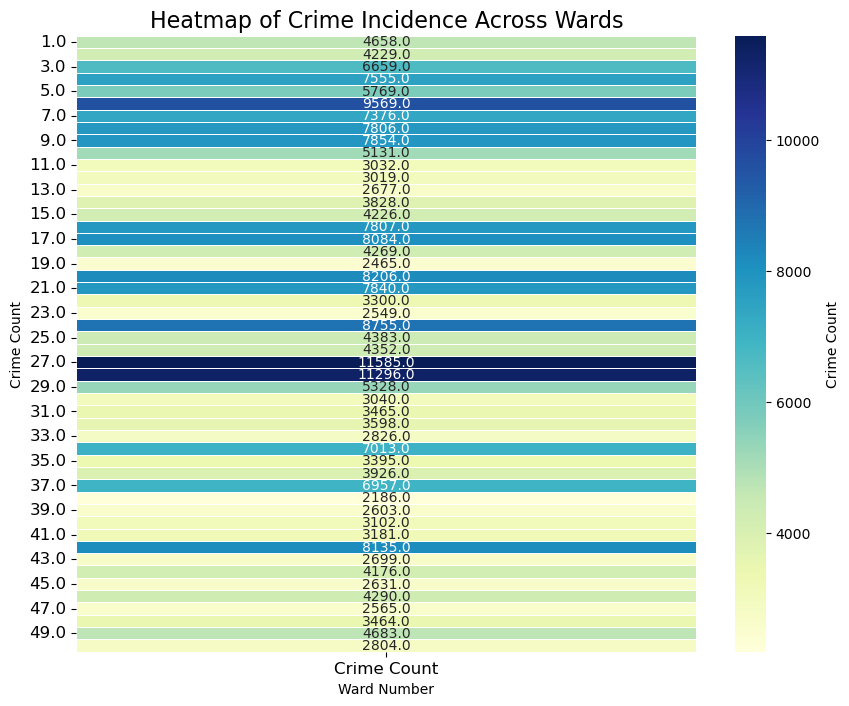

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap with floating-point numbers
plt.figure(figsize=(10, 8))
sns.heatmap(crime_counts_df, cmap="YlGnBu", linewidths=.5, annot=True, fmt=".1f", cbar_kws={'label': 'Crime Count'})

# Add title and labels with improved formatting
plt.title('Heatmap of Crime Incidence Across Wards', fontsize=16)
plt.xlabel('Ward Number')
plt.ylabel('Crime Count')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

In [26]:
location_crime_counts = crime_df['Location Description'].value_counts()
top_location_types = location_crime_counts.head(10)
bottom_location_types = location_crime_counts[location_crime_counts > 0].tail(10)
print("Top 10 Location Types with the Highest Crime Rates:")
print("Top 10 Location Types with the Lowest Crime Rates:")
print(top_location_types)
print(bottom_location_types)

Top 10 Location Types with the Highest Crime Rates:
Top 10 Location Types with the Lowest Crime Rates:
Location Description
STREET                                    71554
APARTMENT                                 47586
RESIDENCE                                 30349
SIDEWALK                                  12661
PARKING LOT / GARAGE (NON RESIDENTIAL)     8339
SMALL RETAIL STORE                         8270
ALLEY                                      6132
RESTAURANT                                 5686
DEPARTMENT STORE                           4864
OTHER (SPECIFY)                            4043
Name: count, dtype: int64
Location Description
RIVER                           1
CHURCH PROPERTY                 1
EXPRESSWAY EMBANKMENT           1
PUBLIC GRAMMAR SCHOOL           1
POLICE FACILITY                 1
BANQUET HALL                    1
PUBLIC HIGH SCHOOL              1
YMCA                            1
POOLROOM                        1
GOVERNMENT BUILDING/PROPERTY    1
Name: cou

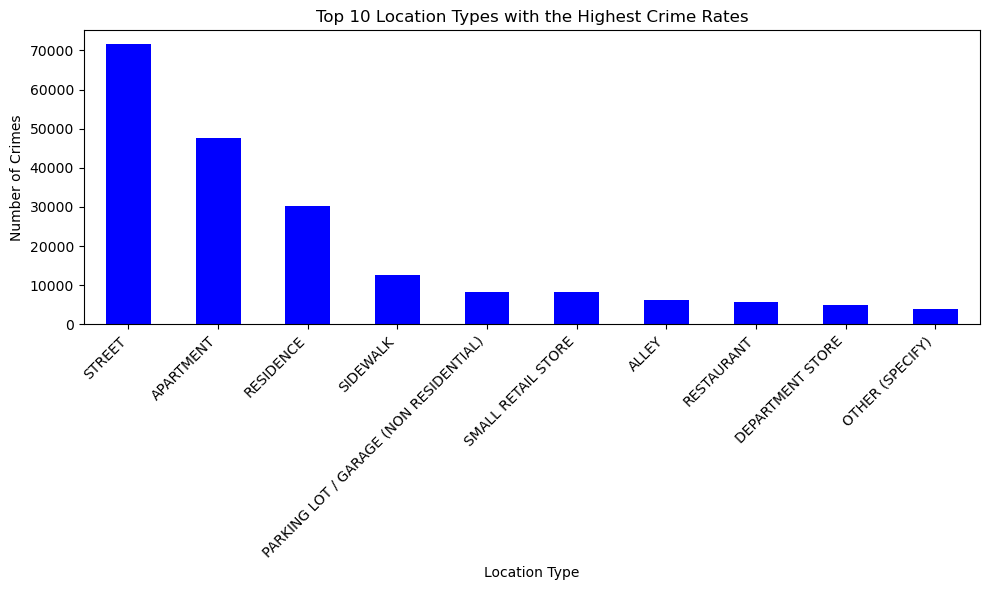

In [41]:
# Bar chart for top 10 locations with the highest crime rates
plt.figure(figsize=(10, 6))
top_location_types.plot(kind='bar', color='blue')

# Add title and labels
plt.title('Top 10 Location Types with the Highest Crime Rates')
plt.xlabel('Location Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha="right", fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

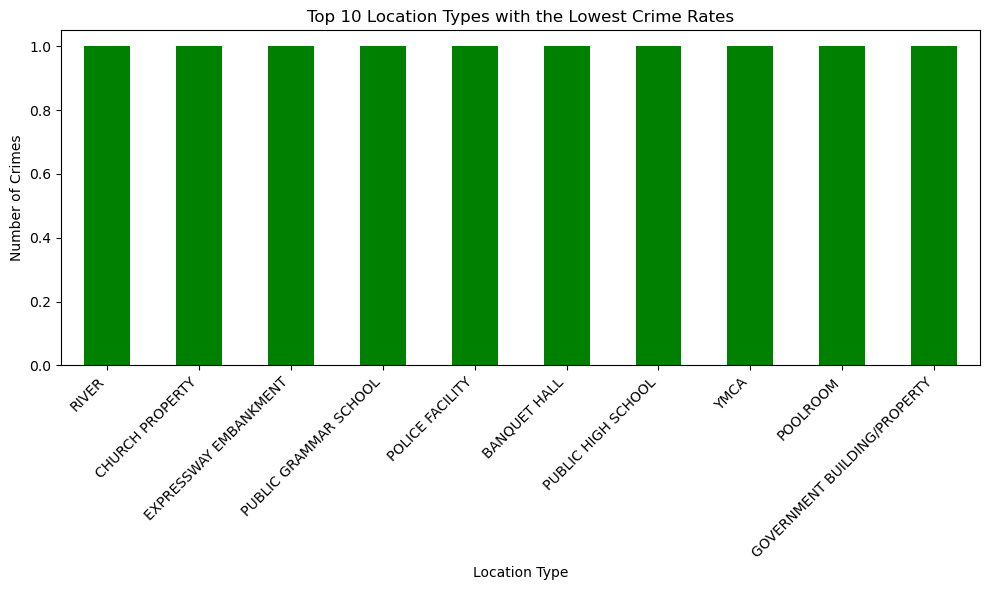

In [42]:
# Bar chart for top 10 locations with the lowest crime rates
plt.figure(figsize=(10, 6))
bottom_location_types.plot(kind='bar', color='green')

# Add title and labels
plt.title('Top 10 Location Types with the Lowest Crime Rates')
plt.xlabel('Location Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha="right", fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

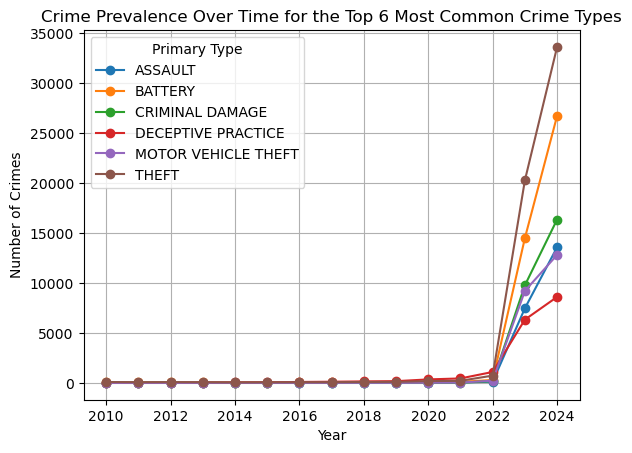

In [43]:
# Ensure that the 'Date' column is in datetime format with a specified format
# Replace '%m/%d/%Y %I:%M:%S %p' with your actual date format
crime_df['Date'] = pd.to_datetime(crime_df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Extract the year from the 'Date' column and create a new 'Year' column
crime_df['Year'] = crime_df['Date'].dt.year

# Identify the top 6 most common 'Primary Type' values
top_6_primary_types = crime_df['Primary Type'].value_counts().head(6).index

# Filter the data for only the top 6 most common crime types
top_crimes_df = crime_df[crime_df['Primary Type'].isin(top_6_primary_types)]

# Group by 'Year' and 'Primary Type' and count the number of crimes
crime_trend = top_crimes_df.groupby(['Year', 'Primary Type']).size().unstack()

# Plot the trends over time for the top 6 crime types
plt.figure(figsize=(14, 8))
crime_trend.plot(kind='line', marker='o')

# Add title and labels
plt.title('Crime Prevalence Over Time for the Top 6 Most Common Crime Types')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(title='Primary Type')
plt.grid(True)

# Display the plot
plt.show()

<Figure size 1400x800 with 0 Axes>

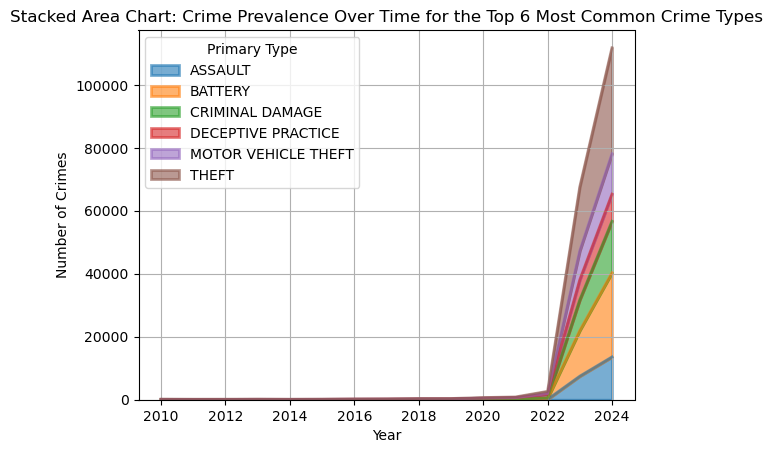

In [44]:
# Create a stacked area chart
plt.figure(figsize=(14, 8))
crime_trend.plot(kind='area', stacked=True, alpha=0.6, linewidth=2)

# Add title and labels
plt.title('Stacked Area Chart: Crime Prevalence Over Time for the Top 6 Most Common Crime Types')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(title='Primary Type', loc='upper left')
plt.grid(True)

# Display the plot
plt.show()

<Figure size 1400x800 with 0 Axes>

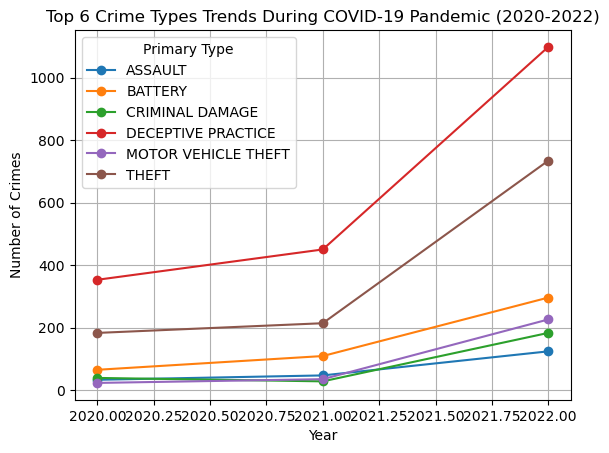

In [28]:
# Ensure that the 'Date' column is in datetime format
crime_df['Date'] = pd.to_datetime(crime_df['Date'])

# Extract the year from the 'Date' column and create a new 'Year' column
crime_df['Year'] = crime_df['Date'].dt.year

# Identify the top 6 most common 'Primary Type' values
top_6_primary_types = crime_df['Primary Type'].value_counts().head(6).index

# Filter the data for only the top 6 most common crime types and for the years 2020-2022
pandemic_crimes_df = crime_df[(crime_df['Primary Type'].isin(top_6_primary_types)) &
                              (crime_df['Year'].isin([2020, 2021, 2022]))]

# Group by 'Year' and 'Primary Type' and count the number of crimes
pandemic_crime_trend = pandemic_crimes_df.groupby(['Year', 'Primary Type']).size().unstack()

# Plot the trends over time for the top 6 crime types during the pandemic years
plt.figure(figsize=(14, 8))
pandemic_crime_trend.plot(kind='line', marker='o')

# Add title and labels
plt.title('Top 6 Crime Types Trends During COVID-19 Pandemic (2020-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(title='Primary Type')
plt.grid(True)

# Display the plot
plt.show()


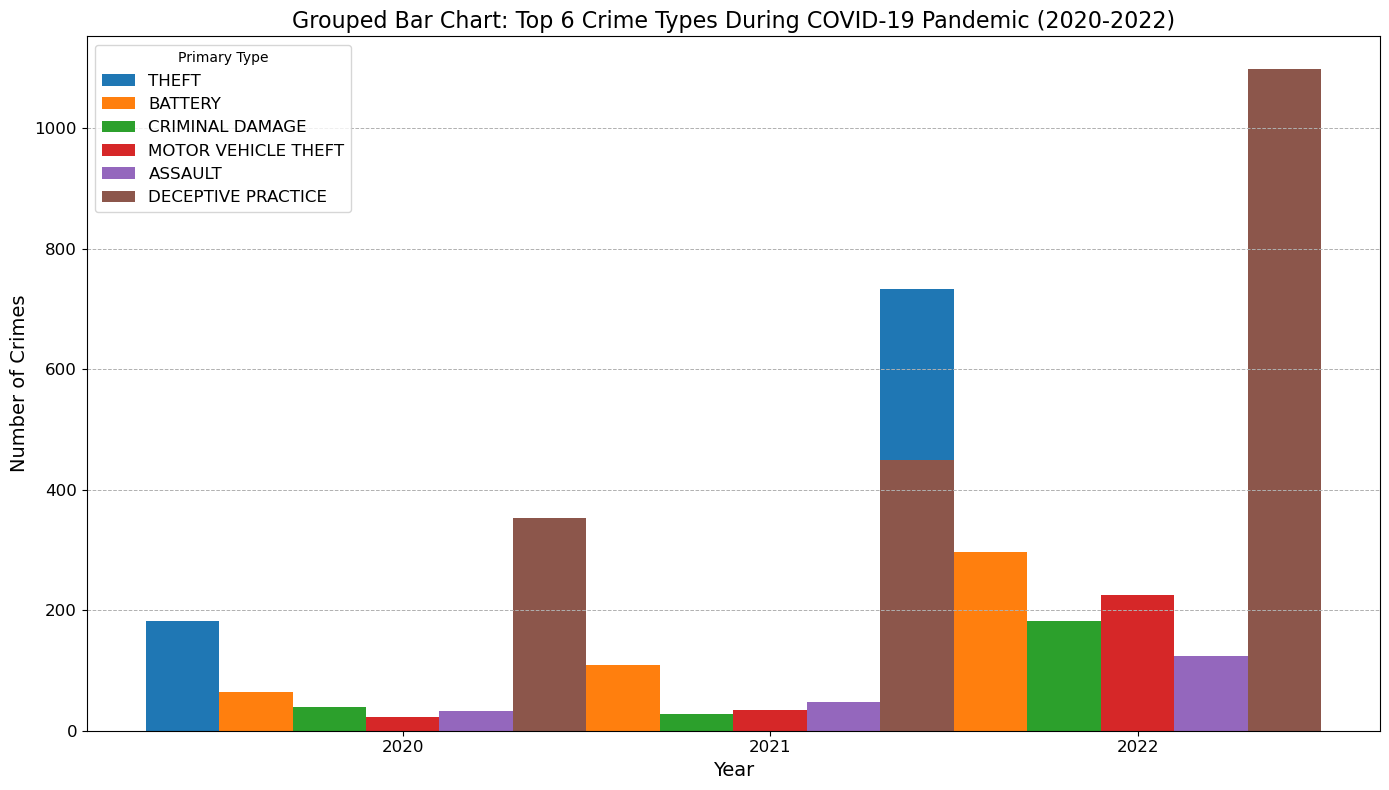

In [45]:
# Prepare the data
years = ['2020', '2021', '2022']
crime_types = top_6_primary_types
data = crime_trend.loc[2020:2022].T  # Transpose to get crime types as rows and years as columns

# Set up the bar width and positions
bar_width = 0.2
index = np.arange(len(years))

# Create the grouped bar chart
plt.figure(figsize=(14, 8))

# Plot bars for each crime type
for i, crime_type in enumerate(crime_types):
    plt.bar(index + i * bar_width, data.loc[crime_type], bar_width, label=crime_type)

# Add title and labels
plt.title('Grouped Bar Chart: Top 6 Crime Types During COVID-19 Pandemic (2020-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.xticks(index + bar_width * (len(crime_types) / 2), years, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Primary Type', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Display the plot
plt.tight_layout()
plt.show()

Year
2010    37.482900
2011    36.903039
2012    38.188976
2013    34.313725
2014    33.753501
2015    32.971014
2016    29.326513
2017    24.818841
2018    27.154047
2019    22.552783
2020    24.365482
2021    25.649203
2022    16.454566
2023    12.378765
2024    13.203794
dtype: float64


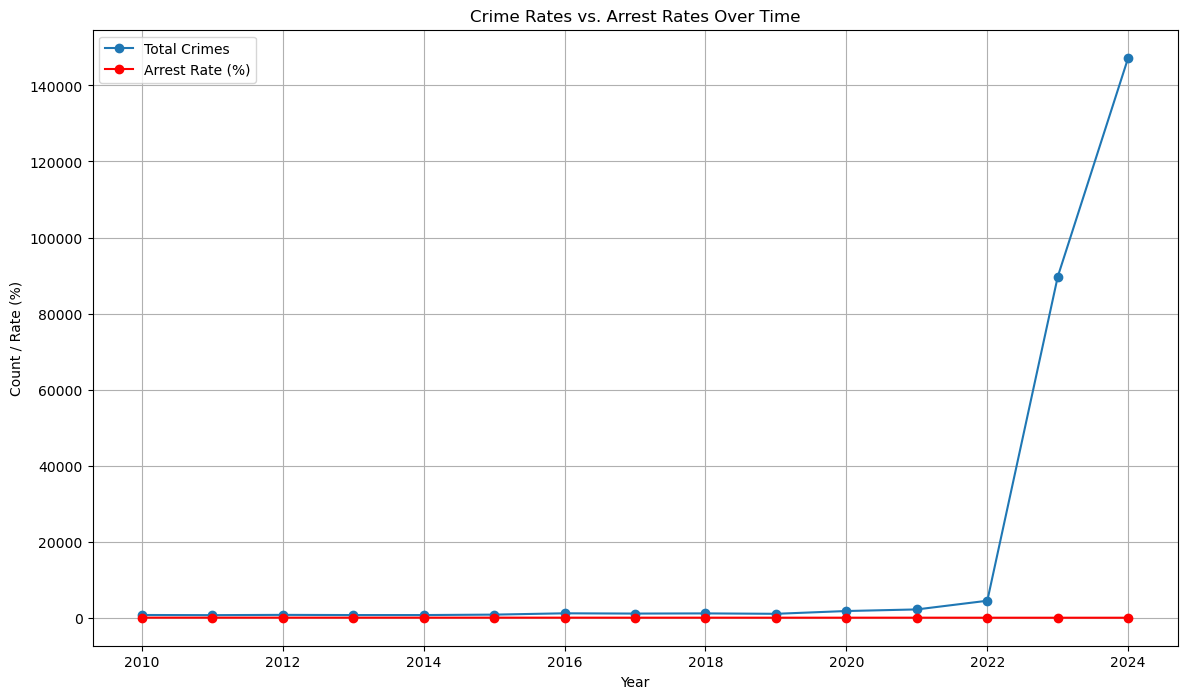

In [29]:
# Ensure that the 'Date' column is in datetime format
crime_df['Date'] = pd.to_datetime(crime_df['Date'])

# Extract the year from the 'Date' column and create a new 'Year' column
crime_df['Year'] = crime_df['Date'].dt.year

# Calculate the total number of crimes per year
total_crimes_per_year = crime_df.groupby('Year').size()

# Calculate the total number of arrests per year
total_arrests_per_year = crime_df[crime_df['Arrest'] == True].groupby('Year').size()

# Calculate the arrest rate per year
arrest_rate_per_year = (total_arrests_per_year / total_crimes_per_year) * 100

# Display the arrest rate
print(arrest_rate_per_year)

# Plot crime rates and arrest rates over time
plt.figure(figsize=(14, 8))

# Plot total crimes
total_crimes_per_year.plot(kind='line', marker='o', label='Total Crimes')

# Plot arrest rates
arrest_rate_per_year.plot(kind='line', marker='o', color='red', label='Arrest Rate (%)')

# Add title and labels
plt.title('Crime Rates vs. Arrest Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Count / Rate (%)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


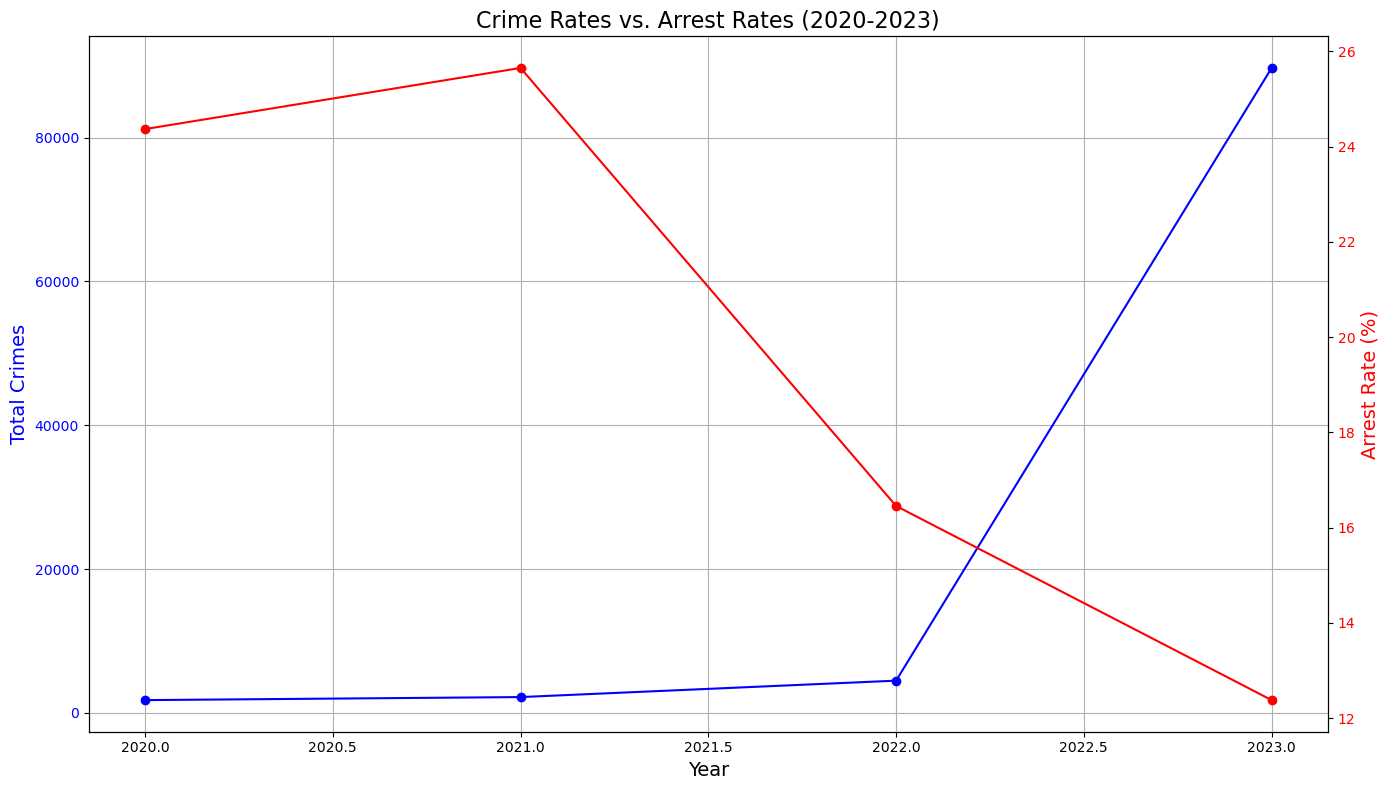

In [47]:
# Filter the data to include only the years 2020 to 2023
filtered_crimes = total_crimes_per_year.loc[2020:2023]
filtered_arrest_rate = arrest_rate_per_year.loc[2020:2023]

# Create a dual-axis line chart
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot the total number of crimes on the first y-axis (left side)
ax1.plot(filtered_crimes.index, filtered_crimes, color='blue', marker='o', label='Total Crimes')
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Total Crimes', color='blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create a second y-axis for the arrest rate (right side)
ax2 = ax1.twinx()
ax2.plot(filtered_arrest_rate.index, filtered_arrest_rate, color='red', marker='o', label='Arrest Rate (%)')
ax2.set_ylabel('Arrest Rate (%)', color='red', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
plt.title('Crime Rates vs. Arrest Rates (2020-2023)', fontsize=16)
fig.tight_layout()  # Adjust layout to ensure everything fits without overlap

# Display the plot
plt.show()

# Summary of Major Findings and Implications

This analysis focused on understanding the distribution and trends of crimes across different wards in **Chicago, Illinois**. We explored the correlation between ward numbers and crime incidence, changes in crime patterns during the COVID-19 pandemic (2020–2022), and the relationship between arrest rates and overall crime rates. The findings provide significant insights into the dynamics of crime in the studied region, with important implications for law enforcement strategies, resource allocation, and policymaking.

## Data Quality Concerns and Potential Skewness

### Observation
During our analysis, we observed discrepancies between the raw data and the calculated metrics, such as crime rates and arrest rates. Specifically, the numbers in the raw data did not always align with the trends and correlations identified. This inconsistency suggests that the data may be skewed or contain inaccuracies, which could potentially affect the reliability of our findings.

### Implication
The potential skewness or inaccuracy in the data highlights the need for cautious interpretation of the results. Policymakers, law enforcement, and other stakeholders should consider these discrepancies when using the findings to inform decisions. It may also be necessary to further investigate the data sources and methodologies used in data collection to ensure accuracy. Future analyses might benefit from cross-referencing with additional data sources or conducting data validation checks to improve the robustness of the conclusions.

## Correlation Between Ward Number and Crime Incidence

### Finding
Our analysis revealed a moderate negative correlation (-0.32) between ward numbers and crime incidence, suggesting that as the ward number increases, the number of crimes tends to decrease. This trend may reflect socioeconomic or geographic factors influencing crime rates, where certain wards possess characteristics that either deter or attract criminal activity.

### Implication
Understanding the distribution of crimes across wards enables law enforcement to allocate resources more effectively, focusing on high-crime areas while maintaining vigilance in lower-crime wards. This insight can also guide community engagement and crime prevention programs, targeting specific wards with tailored interventions.

### Supporting Visualization
A scatter plot with a regression line was used to visualize the relationship between ward numbers and crime incidence, clearly demonstrating the negative trend.

## Changes in Crime Trends During the COVID-19 Pandemic (2020-2022)

### Finding
The analysis of crime trends during the initial years of the COVID-19 pandemic (2020–2022) revealed significant shifts in the prevalence of the top 6 most common crime types. Some crime types experienced noticeable decreases, likely due to lockdown measures and changes in public behavior, while others remained relatively stable or even increased.

### Implication
These findings highlight the impact of external factors, such as a global pandemic, on crime patterns. Policymakers and law enforcement agencies need to consider such external influences when planning for future crises or changes in public policy. This analysis underscores the need for adaptable strategies that can respond to sudden shifts in crime patterns.

### Supporting Visualization
Line plots showing the prevalence of the top 6 crime types over time, focusing on the pandemic years, provided a clear visual comparison of trends before and during the pandemic.

## Arrest Rates Compared to Crime Rates

### Finding
The comparison between arrest rates and crime rates revealed that while the total number of crimes fluctuated over time, the arrest rates did not always follow the same pattern. In some cases, arrest rates decreased even as crime rates increased, possibly indicating strained law enforcement resources or shifts in policing strategy.

### Implication
This finding suggests that while crime rates are a critical metric, arrest rates offer additional insight into law enforcement effectiveness and the criminal justice process. Discrepancies between crime and arrest rates can indicate areas where further investigation or intervention is needed, such as improving response times, increasing patrols, or addressing systemic issues in law enforcement.

### Supporting Visualization
A line plot comparing total crime rates to arrest rates over time was used to visualize the relationship between these two metrics, highlighting periods of divergence.

## Crime Distribution Across Location Types

### Finding
The analysis of crime distribution across different location types identified both high-risk and low-risk areas. Certain location types, such as streets and residences, were associated with higher crime rates, while others, such as airports and lakes, showed much lower crime rates.

### Implication
Identifying high-risk locations is crucial for targeted crime prevention efforts. Law enforcement agencies can use this information to deploy resources more effectively, increase surveillance in high-crime areas, and develop community programs aimed at reducing crime in specific locations. Understanding low-risk regions can also help in identifying successful strategies that might be replicated in higher-risk locations.

### Supporting Visualization
Bar charts displayed the top 10 and bottom 10 location types by crime rate, providing a clear and accessible way to compare different environments.

## Conclusion

Overall, this analysis provides a comprehensive overview of crime dynamics in the wards of Chicago, Illinois, offering valuable insights for law enforcement, policymakers, and community organizations. However, the observed discrepancies between the raw data and calculated metrics indicate that some caution should be exercised in interpreting the results. The use of statistical methods such as correlation analysis, time series analysis, and comparative studies ensures that the findings are robust and well-supported by the data. Nevertheless, addressing the data quality issues and considering potential skewness will be crucial for future studies. By addressing the questions posed in the project proposal with precise descriptions, supported by numbers and visualizations, this report offers actionable insights that can inform future crime prevention and intervention strategies.
